In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

# 00 Data import

In [2]:
def parser(s):
    return pd.to_datetime(s, format='%d/%m/%Y %H:%M:%S.%f')

In [3]:
#Import Export_40 contains percentiled data
per_01 = pd.read_csv("export_40/csv_results_40_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
per_02 = pd.read_csv("export_40/csv_results_40_255440_mp-02-naamsestraat-57-xior.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
per_03 = pd.read_csv("export_40/csv_results_40_255441_mp-03-naamsestraat-62-taste.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
per_04 = pd.read_csv("export_40/csv_results_40_303910_mp-04-his-hears.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
per_05 = pd.read_csv("export_40/csv_results_40_255442_mp-05-calvariekapel-ku-leuven.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
per_06 = pd.read_csv("export_40/csv_results_40_255443_mp-06-parkstraat-2-la-filosovia.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
per_07 = pd.read_csv("export_40/csv_results_40_255444_mp-07-naamsestraat-81.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
per_08 = pd.read_csv("export_40/csv_results_40_255445_mp-08-kiosk-stadspark.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
per_09 = pd.read_csv("export_40/csv_results_40_280324_mp08bis---vrijthof.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)

In [4]:
# Import averaged weather data
LC_2022_Ave = pd.read_csv("LC_2022_Ave.csv")

# 01 Make matrices for classification model

In [5]:

date_rng = pd.date_range(start='2022-01-01', end='2023-01-01', freq='1H')
df = pd.DataFrame(date_rng, columns=['date'])
df = df.drop(df.index[-1])

df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.date
df['time'] = df['date'].dt.time.apply(lambda x: f"{x.hour:02d}:00-{x.hour+1:02d}:00")
df['start_hour'] = df['date'].dt.hour
df["weekday"] = df["date"].dt.day_name()


In [207]:
df

,date,day,time,start_hour,weekday
0,2022-01-01 00:00:00,2022-01-01,00:00-01:00,0,Saturday
1,2022-01-01 01:00:00,2022-01-01,01:00-02:00,1,Saturday
2,2022-01-01 02:00:00,2022-01-01,02:00-03:00,2,Saturday
3,2022-01-01 03:00:00,2022-01-01,03:00-04:00,3,Saturday
4,2022-01-01 04:00:00,2022-01-01,04:00-05:00,4,Saturday
...,...,...,...,...,...
8755,2022-12-31 19:00:00,2022-12-31,19:00-20:00,19,Saturday
8756,2022-12-31 20:00:00,2022-12-31,20:00-21:00,20,Saturday
8757,2022-12-31 21:00:00,2022-12-31,21:00-22:00,21,Saturday
8758,2022-12-31 22:00:00,2022-12-31,22:00-23:00,22,Saturday


In [208]:
LC_2022_Ave

,Unnamed: 0,DATEUTC,ID,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,...,Year,Month,Day,Hour,Minute,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
0,0,2022-01-01 00:10:00,AVE,89.714286,11.547143,38.000000,0.0,0.0,0.0,43.857143,...,2022,1,1,0,10,0.0,13.198571,13.198571,13.104643,13.094123
1,1,2022-01-01 00:20:00,AVE,89.285714,11.450000,37.000000,0.0,0.0,0.0,57.428571,...,2022,1,1,0,20,0.0,13.190000,13.190000,13.096071,13.052405
2,2,2022-01-01 00:30:00,AVE,89.142857,11.454286,37.857143,0.0,0.0,0.0,20.571429,...,2022,1,1,0,30,0.0,13.202857,13.202857,13.108929,13.087100
3,3,2022-01-01 00:40:00,AVE,89.142857,11.467143,37.142857,0.0,0.0,0.0,10.142857,...,2022,1,1,0,40,0.0,13.222857,13.222857,13.128929,13.075781
4,4,2022-01-01 00:50:00,AVE,89.000000,11.457143,32.857143,0.0,0.0,0.0,-11.571429,...,2022,1,1,0,50,0.0,13.231429,13.231429,13.137500,13.073132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,52555,2022-12-31 23:20:00,AVE,52.285714,6.767143,37.000000,0.0,0.0,0.0,23.428571,...,2022,12,31,23,20,0.0,16.605714,16.605714,16.511786,16.480869
52556,52556,2022-12-31 23:30:00,AVE,52.285714,6.718571,38.000000,0.0,0.0,0.0,31.857143,...,2022,12,31,23,30,0.0,16.551429,16.551429,16.457500,16.437574
52557,52557,2022-12-31 23:40:00,AVE,52.142857,6.650000,37.000000,0.0,0.0,0.0,33.857143,...,2022,12,31,23,40,0.0,16.482857,16.482857,16.388929,16.366404
52558,52558,2022-12-31 23:50:00,AVE,52.428571,6.627143,38.000000,0.0,0.0,0.0,65.857143,...,2022,12,31,23,50,0.0,16.380000,16.380000,16.286071,16.266041


Weather data

In [9]:
# houlry average humility, rain, temperature

for i in range(len(df)):
    if df.loc[i,'day'] < dt.date(2022, 3, 27) or df.loc[i,'day'] > dt.date(2022, 10, 30):
        if i==0: # 2022-01-01 00:00 is not in the LC_2022_Ave
            df.loc[i,'LC_HUMIDITY'] = sum(LC_2022_Ave.loc[0:4,'LC_HUMIDITY'])/5
            df.loc[i, 'LC_RAININ'] = sum(LC_2022_Ave.loc[0:4,'LC_RAININ'])/5
            df.loc[i, 'LC_TEMP_QCL3_list'] = sum(LC_2022_Ave.loc[0:4,'LC_TEMP_QCL3'])/5
            df.loc[i, 'LC_DWPTEMP'] = sum(LC_2022_Ave.loc[0:4, 'LC_DWPTEMP']) / 5
            df.loc[i, 'LC_n'] = sum(LC_2022_Ave.loc[0:4, 'LC_n']) / 5
            df.loc[i, 'LC_RAD'] = sum(LC_2022_Ave.loc[0:4, 'LC_RAD']) / 5
            df.loc[i, 'LC_DAILYRAIN'] = sum(LC_2022_Ave.loc[0:4, 'LC_DAILYRAIN']) / 5
            df.loc[i, 'LC_WINDDIR'] = sum(LC_2022_Ave.loc[0:4, 'LC_WINDDIR']) / 5
            df.loc[i, 'LC_WINDSPEED'] = sum(LC_2022_Ave.loc[0:4, 'LC_WINDSPEED']) / 5
        else:
            df.loc[i,'LC_HUMIDITY'] = sum(LC_2022_Ave.loc[6*(i-1)-1:6*(i-1)+4,'LC_HUMIDITY'])/6
            df.loc[i, 'LC_RAININ'] = sum(LC_2022_Ave.loc[6*(i-1)-1:6*(i-1)+4,'LC_RAININ'])/6
            df.loc[i, 'LC_TEMP_QCL3_list'] = sum(LC_2022_Ave.loc[6*(i-1)-1:6*(i-1)+4,'LC_TEMP_QCL3'])/6
            df.loc[i, 'LC_DWPTEMP'] = sum(LC_2022_Ave.loc[6 * (i - 1) - 1:6 * (i - 1) + 4, 'LC_DWPTEMP']) / 6
            df.loc[i, 'LC_n'] = sum(LC_2022_Ave.loc[6 * (i - 1) - 1:6 * (i - 1) + 4, 'LC_n']) / 6
            df.loc[i, 'LC_RAD'] = sum(LC_2022_Ave.loc[6 * (i - 1) - 1:6 * (i - 1) + 4, 'LC_RAD']) / 6
            df.loc[i, 'LC_DAILYRAIN'] = sum(LC_2022_Ave.loc[6 * (i - 1) - 1:6 * (i - 1) + 4, 'LC_DAILYRAIN']) / 6
            df.loc[i, 'LC_WINDDIR'] = sum(LC_2022_Ave.loc[6 * (i - 1) - 1:6 * (i - 1) + 4, 'LC_WINDDIR']) / 6
            df.loc[i, 'LC_WINDSPEED'] = sum(LC_2022_Ave.loc[6 * (i - 1) - 1:6 * (i - 1) + 4, 'LC_WINDSPEED']) / 6
    else:
        df.loc[i,'LC_HUMIDITY'] = sum(LC_2022_Ave.loc[6*(i-2)-1:6*(i-2)+4,'LC_HUMIDITY'])/6
        df.loc[i, 'LC_RAININ'] = sum(LC_2022_Ave.loc[6*(i-2)-1:6*(i-2)+4,'LC_RAININ'])/6
        df.loc[i, 'LC_TEMP_QCL3_list'] = sum(LC_2022_Ave.loc[6*(i-2)-1:6*(i-2)+4,'LC_TEMP_QCL3'])/6
        df.loc[i, 'LC_DWPTEMP'] = sum(LC_2022_Ave.loc[6 * (i - 2) - 1:6 * (i - 2) + 4, 'LC_DWPTEMP']) / 6
        df.loc[i, 'LC_n'] = sum(LC_2022_Ave.loc[6 * (i - 2) - 1:6 * (i - 2) + 4, 'LC_n']) / 6
        df.loc[i, 'LC_RAD'] = sum(LC_2022_Ave.loc[6 * (i - 2) - 1:6 * (i - 2) + 4, 'LC_RAD']) / 6
        df.loc[i, 'LC_DAILYRAIN'] = sum(LC_2022_Ave.loc[6 * (i - 2) - 1:6 * (i - 2) + 4, 'LC_DAILYRAIN']) / 6
        df.loc[i, 'LC_WINDDIR'] = sum(LC_2022_Ave.loc[6 * (i - 2) - 1:6 * (i - 2) + 4, 'LC_WINDDIR']) / 6
        df.loc[i, 'LC_WINDSPEED'] = sum(LC_2022_Ave.loc[6 * (i - 2) - 1:6 * (i - 2) + 4, 'LC_WINDSPEED']) / 6
        

    

In [11]:
df

,date,day,time,start_hour,weekday,LC_HUMIDITY,LC_RAININ,LC_TEMP_QCL3_list,LC_DWPTEMP,LC_n,LC_RAD,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED
0,2022-01-01 00:00:00,2022-01-01,00:00-01:00,0,Saturday,89.257143,0.000000,13.076508,11.475143,36.571429,0.0,0.000000,24.085714,0.082857
1,2022-01-01 01:00:00,2022-01-01,01:00-02:00,1,Saturday,74.380952,0.000000,10.897090,9.562619,30.476190,0.0,0.000000,20.071429,0.069048
2,2022-01-01 02:00:00,2022-01-01,02:00-03:00,2,Saturday,88.333333,0.000000,13.079861,11.302817,37.265873,0.0,0.000000,5.408730,0.118571
3,2022-01-01 03:00:00,2022-01-01,03:00-04:00,3,Saturday,88.142857,0.000071,12.883877,11.127143,37.500000,0.0,0.000000,19.738095,0.098333
4,2022-01-01 04:00:00,2022-01-01,04:00-05:00,4,Saturday,87.976190,0.000000,12.772610,10.935476,37.500000,0.0,0.000000,22.357143,0.109762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,2022-12-31,19:00-20:00,19,Saturday,61.357143,0.000000,15.681402,8.411865,36.726190,0.0,0.000603,36.277778,1.014881
8756,2022-12-31 20:00:00,2022-12-31,20:00-21:00,20,Saturday,57.952381,0.000000,15.955844,7.827381,37.380952,0.0,0.000571,45.571429,1.214762
8757,2022-12-31 21:00:00,2022-12-31,21:00-22:00,21,Saturday,56.500000,0.000000,16.187194,7.687619,37.500000,0.0,0.000571,40.642857,1.309524
8758,2022-12-31 22:00:00,2022-12-31,22:00-23:00,22,Saturday,56.261905,0.000000,16.059805,7.516667,37.452381,0.0,0.000571,37.833333,1.255000


Event

In [12]:
# Import event data
school = pd.read_csv("https://mda-noise.s3.eu-central-1.amazonaws.com/school_holidays_belg.csv", encoding="mac_roman")
loko = pd.read_csv("https://mda-noise.s3.eu-central-1.amazonaws.com/events_loko.csv")
depot = pd.read_csv("https://mda-noise.s3.eu-central-1.amazonaws.com/depot.csv")

In [13]:
# school data transformation
rows_list = []

for index, row in school.iterrows():
    name = row['Holiday']
    start_date = row['StartDate']
    end_date = row['EndDate']

    if start_date == end_date:
        rows_list.append({'Name': name, 'Date': start_date})
    else:
        date_range = pd.date_range(start=start_date, end=end_date)
        for date in date_range:
            rows_list.append({'Name': name, 'Date': date})

# Create a new DataFrame from the list of rows
school_date = pd.DataFrame(rows_list)
# Filter the DataFrame to only include the Vlaanderen data
school_date = school_date[school_date['Name'].str.contains('Vlaanderen', na=False)].reset_index(drop=True)
school_date['Date'] = pd.to_datetime(school_date['Date'])
# Display the transformed data
school_date

,Name,Date
0,Krokusvakantie 2022 – Vlaanderen –,2022-02-28
1,Krokusvakantie 2022 – Vlaanderen –,2022-03-01
2,Krokusvakantie 2022 – Vlaanderen –,2022-03-02
3,Krokusvakantie 2022 – Vlaanderen –,2022-03-03
4,Krokusvakantie 2022 – Vlaanderen –,2022-03-04
...,...,...
102,Kerstvakantie 2022 – Vlaanderen –,2023-01-04
103,Kerstvakantie 2022 – Vlaanderen –,2023-01-05
104,Kerstvakantie 2022 – Vlaanderen –,2023-01-06
105,Kerstvakantie 2022 – Vlaanderen –,2023-01-07


In [14]:
# loko data transformation
rows_list = []

for index, row in loko.iterrows():
    name = row['event']
    start_date = row['startdate']
    end_date = row['enddate']

    if start_date == end_date:
        rows_list.append({'Name': name, 'Date': start_date})
    else:
        date_range = pd.date_range(start=start_date, end=end_date)
        for date in date_range:
            rows_list.append({'Name': name, 'Date': date})

# Create a new DataFrame from the list of rows
loko_date = pd.DataFrame(rows_list)
loko_date['Date'] = pd.to_datetime(loko_date['Date'])
# Display the transformed data
loko_date

/var/folders/l5/n_yt5zmn3z9111sht9xxfwfh0000gn/T/ipykernel_92124/1684919225.py:17: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  loko_date = pd.DataFrame(rows_list)


,Name,Date
0,Student Conference 2022,2023-05-02
1,Student Conference 2022,2023-05-03
2,Student Conference 2022,2023-05-04
3,Student Conference 2022,2023-05-05
4,Survival of the Student,2023-04-19
...,...,...
73,Think Abroad Week 2021,2021-03-02
74,Think Abroad Week 2021,2021-03-03
75,Think Abroad Week 2021,2021-03-04
76,Think Abroad Week 2021,2021-03-05


In [15]:
# depot data transformation
rows_list = []

for index, row in depot.iterrows():
    name = row['Event Name']
    start_date = row['StartDate']
    end_date = row['EndDate']

    if start_date == end_date:
        rows_list.append({'Name': name, 'Date': start_date})
    else:
        date_range = pd.date_range(start=start_date, end=end_date)
        for date in date_range:
            rows_list.append({'Name': name, 'Date': date})

# Create a new DataFrame from the list of rows
depot_date = pd.DataFrame(rows_list)
depot_date['Date'] = pd.to_datetime(depot_date['Date'])

# Display the transformed data
depot_date

,Name,Date
0,Otto-Jan Ham blikt terug op 2022,2022-12-23
1,Axelle Red: a very special Christmas ...,2022-12-20
2,Arnout Van den Bossche ...,2022-12-19
3,Dub Unit #3,2022-12-17
4,Dub Unit #3,2022-12-18
...,...,...
218,Preselectie Humo's Rock Rally 2022,2022-01-29
219,Stijn Meuris – Tirade #5 – De Stilstand,2022-01-28
220,Steve Wynn \n ...,2022-01-25
221,COOL presents Aaron Frazer ...,2022-01-24


In [16]:
# count the number of events per day
school_date_counts = school_date['Date'].value_counts().sort_index()
df['school'] = df['day'].map(school_date_counts)
df['school'] = df['school'].fillna(0)
loko_date_counts = loko_date['Date'].value_counts().sort_index()
df['loko'] = df['day'].map(loko_date_counts)
df['loko'] = df['loko'].fillna(0)
depot_date_counts = depot_date['Date'].value_counts().sort_index()
df['depot'] = df['day'].map(depot_date_counts)
df['depot'] = df['depot'].fillna(0)

df


,date,day,time,start_hour,weekday,LC_HUMIDITY,LC_RAININ,LC_TEMP_QCL3_list,LC_DWPTEMP,LC_n,LC_RAD,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,school,loko,depot
0,2022-01-01 00:00:00,2022-01-01,00:00-01:00,0,Saturday,89.257143,0.000000,13.076508,11.475143,36.571429,0.0,0.000000,24.085714,0.082857,0.0,0.0,0.0
1,2022-01-01 01:00:00,2022-01-01,01:00-02:00,1,Saturday,74.380952,0.000000,10.897090,9.562619,30.476190,0.0,0.000000,20.071429,0.069048,0.0,0.0,0.0
2,2022-01-01 02:00:00,2022-01-01,02:00-03:00,2,Saturday,88.333333,0.000000,13.079861,11.302817,37.265873,0.0,0.000000,5.408730,0.118571,0.0,0.0,0.0
3,2022-01-01 03:00:00,2022-01-01,03:00-04:00,3,Saturday,88.142857,0.000071,12.883877,11.127143,37.500000,0.0,0.000000,19.738095,0.098333,0.0,0.0,0.0
4,2022-01-01 04:00:00,2022-01-01,04:00-05:00,4,Saturday,87.976190,0.000000,12.772610,10.935476,37.500000,0.0,0.000000,22.357143,0.109762,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,2022-12-31,19:00-20:00,19,Saturday,61.357143,0.000000,15.681402,8.411865,36.726190,0.0,0.000603,36.277778,1.014881,1.0,0.0,0.0
8756,2022-12-31 20:00:00,2022-12-31,20:00-21:00,20,Saturday,57.952381,0.000000,15.955844,7.827381,37.380952,0.0,0.000571,45.571429,1.214762,1.0,0.0,0.0
8757,2022-12-31 21:00:00,2022-12-31,21:00-22:00,21,Saturday,56.500000,0.000000,16.187194,7.687619,37.500000,0.0,0.000571,40.642857,1.309524,1.0,0.0,0.0
8758,2022-12-31 22:00:00,2022-12-31,22:00-23:00,22,Saturday,56.261905,0.000000,16.059805,7.516667,37.452381,0.0,0.000571,37.833333,1.255000,1.0,0.0,0.0


Location

In [17]:
locations = {
    'Number 35': {'Latitude': 50.877145629042914, 'Longitude': 4.700687827346834},
    'Number 57': {'Latitude': 50.876508363711494, 'Longitude': 4.700571000329153},
    'Number 62': {'Latitude': 50.8758501663235, 'Longitude': 4.700202605039998},
    'Number 76 ("His & Hears” Hair salon in Leuven)': {'Latitude': 50.87526199805131, 'Longitude': 4.700102082393327},
    'Calvarie Chapel (near the Faculty of Economics)': {'Latitude': 50.87452362687141, 'Longitude': 4.699906626536335},
    'Corner of the Parkstraat & Naamse straat': {'Latitude': 50.87423613960728, 'Longitude': 4.700032390606964},
    'Number 81': {'Latitude': 50.87382304090069, 'Longitude': 4.7000419302889895},
    'Kiosk Stadspark': {'Latitude': 50.875267749983614, 'Longitude': 4.701498137515181},
    'Vrijthof': {'Latitude': 50.878747974857156, 'Longitude': 4.70113377876015}
}

In [18]:
dfs = {}

for i in range(1, 10):
    dfs[f"df_0{i}"] = df.copy()
    key = list(locations.keys())[i-1]
    dfs[f"df_0{i}"]["location"] = key
    dfs[f"df_0{i}"]["Latitude"] = locations[key]['Latitude']
    dfs[f"df_0{i}"]["Longitude"] = locations[key]['Longitude']
    dfs[f"df_0{i}"]["laf50_per_hour"] = np.nan  # Initialize the column with missing values (NaN)
    for j, row1 in globals()[f"per_0{i}"].iterrows():
        mask = dfs[f"df_0{i}"]['date'] == row1['result_timestamp']
        dfs[f"df_0{i}"].loc[mask, "laf50_per_hour"] = row1["laf50_per_hour"]
    # Filter rows where 'date' is on or after 2022-03-01, and on 2022-03-27 and 2022-10-30
    dfs[f"df_0{i}"] = dfs[f"df_0{i}"][dfs[f"df_0{i}"]["date"] >= '2022-03-01'].reset_index(drop=True)
    dfs[f"df_0{i}"] = dfs[f"df_0{i}"][dfs[f"df_0{i}"]["day"] != pd.to_datetime('2022-03-27')]
    dfs[f"df_0{i}"] = dfs[f"df_0{i}"][dfs[f"df_0{i}"]["day"] != pd.to_datetime('2022-10-30')]
    


/Users/shinichimoribe/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/Users/shinichimoribe/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/Users/shinichimoribe/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavi

In [19]:
dfs["df_01"]


,date,day,time,start_hour,weekday,LC_HUMIDITY,LC_RAININ,LC_TEMP_QCL3_list,LC_DWPTEMP,LC_n,...,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,school,loko,depot,location,Latitude,Longitude,laf50_per_hour
0,2022-03-01 00:00:00,2022-03-01,00:00-01:00,0,Tuesday,79.722222,0.0,1.932109,-1.187778,36.250000,...,0.000000,-5.111111,0.011944,1.0,1.0,1.0,Number 35,50.877146,4.700688,NaN
1,2022-03-01 01:00:00,2022-03-01,01:00-02:00,1,Tuesday,78.809524,0.0,1.732657,-1.525952,36.238095,...,0.000000,-9.476190,0.006667,1.0,1.0,1.0,Number 35,50.877146,4.700688,NaN
2,2022-03-01 02:00:00,2022-03-01,02:00-03:00,2,Tuesday,77.738095,0.0,1.727462,-1.710952,36.285714,...,0.000000,5.071429,0.019286,1.0,1.0,1.0,Number 35,50.877146,4.700688,NaN
3,2022-03-01 03:00:00,2022-03-01,03:00-04:00,3,Tuesday,76.714286,0.0,1.934884,-1.654048,36.333333,...,0.000000,22.380952,0.010000,1.0,1.0,1.0,Number 35,50.877146,4.700688,NaN
4,2022-03-01 04:00:00,2022-03-01,04:00-05:00,4,Tuesday,79.023810,0.0,1.647822,-1.591429,36.380952,...,0.000000,12.619048,0.003333,1.0,1.0,1.0,Number 35,50.877146,4.700688,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,2022-12-31 19:00:00,2022-12-31,19:00-20:00,19,Saturday,61.357143,0.0,15.681402,8.411865,36.726190,...,0.000603,36.277778,1.014881,1.0,0.0,0.0,Number 35,50.877146,4.700688,NaN
7340,2022-12-31 20:00:00,2022-12-31,20:00-21:00,20,Saturday,57.952381,0.0,15.955844,7.827381,37.380952,...,0.000571,45.571429,1.214762,1.0,0.0,0.0,Number 35,50.877146,4.700688,NaN
7341,2022-12-31 21:00:00,2022-12-31,21:00-22:00,21,Saturday,56.500000,0.0,16.187194,7.687619,37.500000,...,0.000571,40.642857,1.309524,1.0,0.0,0.0,Number 35,50.877146,4.700688,NaN
7342,2022-12-31 22:00:00,2022-12-31,22:00-23:00,22,Saturday,56.261905,0.0,16.059805,7.516667,37.452381,...,0.000571,37.833333,1.255000,1.0,0.0,0.0,Number 35,50.877146,4.700688,NaN


In [20]:
#baseline
baseline = {}
for i in range(1, 10):
    baseline[f"b_0{i}"] = {}
    weekday_day = dfs[f"df_0{i}"][(dfs[f"df_0{i}"]["weekday"].isin(["Saturday", "Sunday"]) == False) & (dfs[f"df_0{i}"]["start_hour"].between(6, 19))]
    weekday_night = dfs[f"df_0{i}"][(dfs[f"df_0{i}"]["weekday"].isin(["Saturday", "Sunday"]) == False) & (dfs[f"df_0{i}"]["start_hour"].between(6, 19) == False)]
    weekend_day = dfs[f"df_0{i}"][(dfs[f"df_0{i}"]["weekday"].isin(["Saturday", "Sunday"])) & (dfs[f"df_0{i}"]["start_hour"].between(6, 19))]
    weekend_night = dfs[f"df_0{i}"][(dfs[f"df_0{i}"]["weekday"].isin(["Saturday", "Sunday"])) & (dfs[f"df_0{i}"]["start_hour"].between(6, 19) == False)]
    baseline[f"b_0{i}"]["Weekday-Day"]= weekday_day["laf50_per_hour"].mean()
    baseline[f"b_0{i}"]["Weekday-Night"]= weekday_night["laf50_per_hour"].mean()
    baseline[f"b_0{i}"]["Weekend-Day"]= weekend_day["laf50_per_hour"].mean()
    baseline[f"b_0{i}"]["Weekend-Night"]= weekend_night["laf50_per_hour"].mean()


In [21]:
baseline["b_01"]

{'Weekday-Day': 53.24381520119226,
 'Weekday-Night': 49.66761805915926,
 'Weekend-Day': 48.73371647509582,
 'Weekend-Night': 48.85799999999999}

In [22]:
#make a column with the baseline values
for i in range(1, 10):
    weekday_day_mask = (dfs[f"df_0{i}"]["weekday"].isin(["Saturday", "Sunday"]) == False) & (dfs[f"df_0{i}"]["start_hour"].between(6, 19))
    weekday_night_mask = (dfs[f"df_0{i}"]["weekday"].isin(["Saturday", "Sunday"]) == False) & (dfs[f"df_0{i}"]["start_hour"].between(6, 19) == False)
    weekend_day_mask = (dfs[f"df_0{i}"]["weekday"].isin(["Saturday", "Sunday"])) & (dfs[f"df_0{i}"]["start_hour"].between(6, 19))
    weekend_night_mask = (dfs[f"df_0{i}"]["weekday"].isin(["Saturday", "Sunday"])) & (dfs[f"df_0{i}"]["start_hour"].between(6, 19) == False)

    dfs[f"df_0{i}"].loc[weekday_day_mask,"baseline"] = baseline[f"b_0{i}"]["Weekday-Day"]
    dfs[f"df_0{i}"].loc[weekday_night_mask,"baseline"] = baseline[f"b_0{i}"]["Weekday-Night"]
    dfs[f"df_0{i}"].loc[weekend_day_mask,"baseline"] = baseline[f"b_0{i}"]["Weekend-Day"]
    dfs[f"df_0{i}"].loc[weekend_night_mask,"baseline"] = baseline[f"b_0{i}"]["Weekend-Night"]


    

In [23]:
#make a column with the noisiness (0 or 1)
for i in range(1, 10):
    dfs[f"df_0{i}"]["noisiness"] = dfs[f"df_0{i}"]["laf50_per_hour"] > dfs[f"df_0{i}"]["baseline"]

In [24]:
dfs["df_01"]

,date,day,time,start_hour,weekday,LC_HUMIDITY,LC_RAININ,LC_TEMP_QCL3_list,LC_DWPTEMP,LC_n,...,LC_WINDSPEED,school,loko,depot,location,Latitude,Longitude,laf50_per_hour,baseline,noisiness
0,2022-03-01 00:00:00,2022-03-01,00:00-01:00,0,Tuesday,79.722222,0.0,1.932109,-1.187778,36.250000,...,0.011944,1.0,1.0,1.0,Number 35,50.877146,4.700688,NaN,49.667618,False
1,2022-03-01 01:00:00,2022-03-01,01:00-02:00,1,Tuesday,78.809524,0.0,1.732657,-1.525952,36.238095,...,0.006667,1.0,1.0,1.0,Number 35,50.877146,4.700688,NaN,49.667618,False
2,2022-03-01 02:00:00,2022-03-01,02:00-03:00,2,Tuesday,77.738095,0.0,1.727462,-1.710952,36.285714,...,0.019286,1.0,1.0,1.0,Number 35,50.877146,4.700688,NaN,49.667618,False
3,2022-03-01 03:00:00,2022-03-01,03:00-04:00,3,Tuesday,76.714286,0.0,1.934884,-1.654048,36.333333,...,0.010000,1.0,1.0,1.0,Number 35,50.877146,4.700688,NaN,49.667618,False
4,2022-03-01 04:00:00,2022-03-01,04:00-05:00,4,Tuesday,79.023810,0.0,1.647822,-1.591429,36.380952,...,0.003333,1.0,1.0,1.0,Number 35,50.877146,4.700688,NaN,49.667618,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,2022-12-31 19:00:00,2022-12-31,19:00-20:00,19,Saturday,61.357143,0.0,15.681402,8.411865,36.726190,...,1.014881,1.0,0.0,0.0,Number 35,50.877146,4.700688,NaN,48.733716,False
7340,2022-12-31 20:00:00,2022-12-31,20:00-21:00,20,Saturday,57.952381,0.0,15.955844,7.827381,37.380952,...,1.214762,1.0,0.0,0.0,Number 35,50.877146,4.700688,NaN,48.858000,False
7341,2022-12-31 21:00:00,2022-12-31,21:00-22:00,21,Saturday,56.500000,0.0,16.187194,7.687619,37.500000,...,1.309524,1.0,0.0,0.0,Number 35,50.877146,4.700688,NaN,48.858000,False
7342,2022-12-31 22:00:00,2022-12-31,22:00-23:00,22,Saturday,56.261905,0.0,16.059805,7.516667,37.452381,...,1.255000,1.0,0.0,0.0,Number 35,50.877146,4.700688,NaN,48.858000,False


In [224]:
# export the dataframes to csv
dfs["df_01"].to_csv("df_01.csv", index=False)
dfs["df_02"].to_csv("df_02.csv", index=False)
dfs["df_03"].to_csv("df_03.csv", index=False)
dfs["df_04"].to_csv("df_04.csv", index=False)
dfs["df_05"].to_csv("df_05.csv", index=False)
dfs["df_06"].to_csv("df_06.csv", index=False)
dfs["df_07"].to_csv("df_07.csv", index=False)
dfs["df_08"].to_csv("df_08.csv", index=False)
dfs["df_09"].to_csv("df_09.csv", index=False)

# 02 EDA

In [130]:
list_df = [dfs["df_01"], dfs["df_02"], dfs["df_03"], dfs["df_04"], dfs["df_05"], dfs["df_06"], dfs["df_07"], dfs["df_09"]]
name_df = ['df_01','df_02','df_03','df_04','df_05','df_06','df_07','df_09']

In [131]:
#make variables "weekend" from 'weekday' (1 if saturday/sunday) and 'daytime' from start_hour (1 if 20-05)
def weekend_daytime(df):
  df['Monday-Wednesday'] = df['weekday'].isin(['Monday','Tuesday','Wednesday']).astype(int)
  df['Monday'] = df['weekday'].isin(['Monday']).astype(int)
  df['Tuseday']= df['weekday'].isin(['Tuesday']).astype(int)
  df['Wednesday'] = df['weekday'].isin(['Wednesday']).astype(int)
  df['Thursday'] = df['weekday'].isin(['Thursday']).astype(int)
  df['Friday'] = df['weekday'].isin(['Friday']).astype(int)
  df['Thursday-Friday'] = df['weekday'].isin(['Thursday','Friday']).astype(int)
  df['Saturday'] = df['weekday'].isin(['Saturday']).astype(int)
  df['Sunday'] = df['weekday'].isin(['Sunday']).astype(int)
  df['late-at-night'] = df['start_hour'].isin([1,2,3,4,5,6,7]).astype(int)
  df['evening'] = df['start_hour'].isin([20,21,22]).astype(int)
  df['summer'] = (df['date'] >= '2022-07-01') & (df['date'] <= '2022-08-31').astype(int)
  df['date'] = pd.to_datetime(df['date'])
 
  return df

for i in list_df:
  i = weekend_daytime(i)

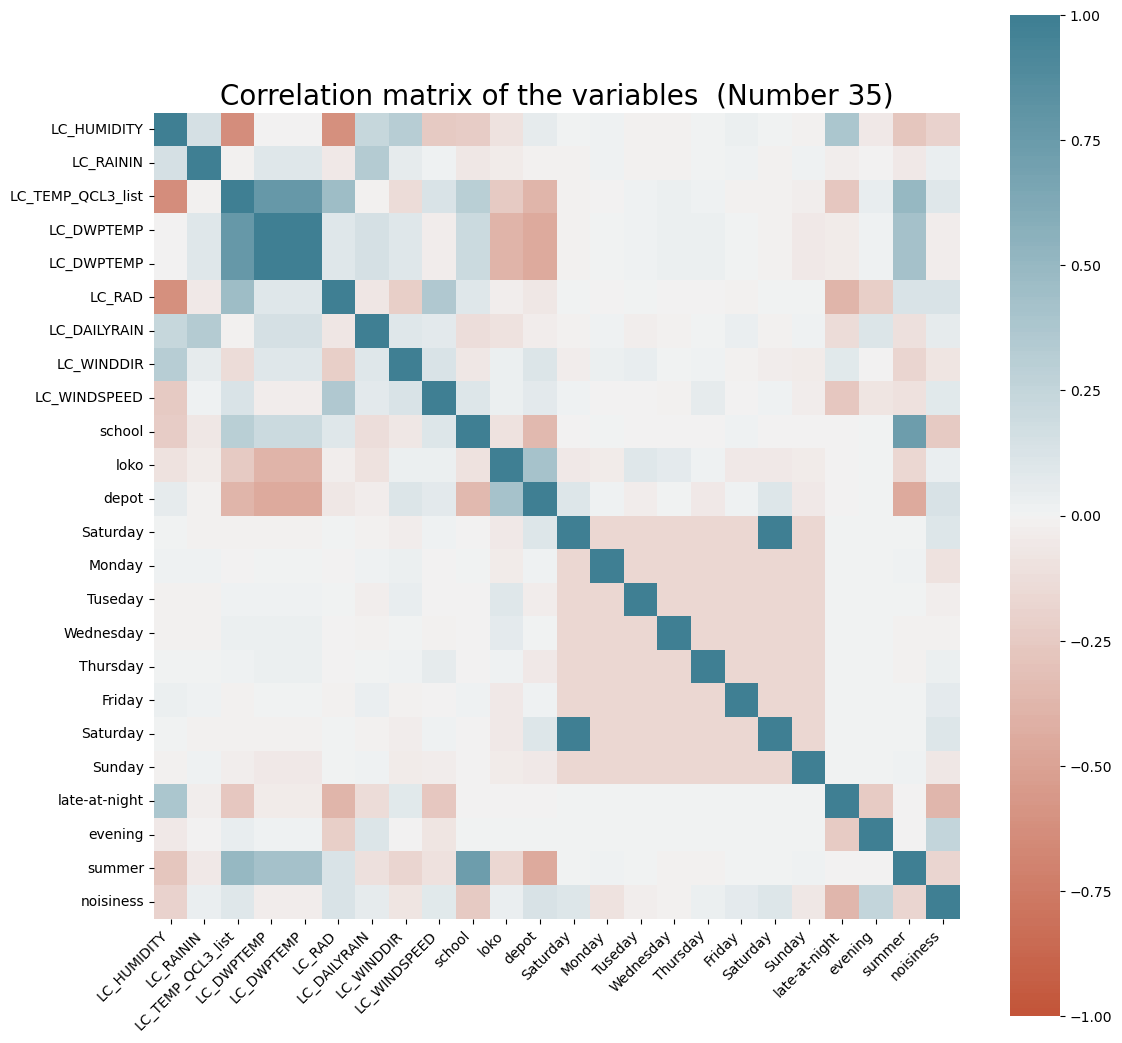

In [125]:
# make a correlation matrix
i=0
corr=list_df[i][['LC_HUMIDITY','LC_RAININ','LC_TEMP_QCL3_list', 'LC_DWPTEMP', 'LC_DWPTEMP',	'LC_RAD', 'LC_DAILYRAIN', 'LC_WINDDIR', 'LC_WINDSPEED','school', 'loko', 'depot','Saturday','Monday','Tuseday', 'Wednesday','Thursday','Friday','Saturday','Sunday','late-at-night','evening', 'summer','noisiness']].corr()
plt.figure(figsize=(13, 13))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    #annot=True,
    #annot_kws={"size": 8},
    #fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation matrix of the variables  (' + str(list_df[i]["location"].values[0]) + ')', fontsize=20)
plt.show()

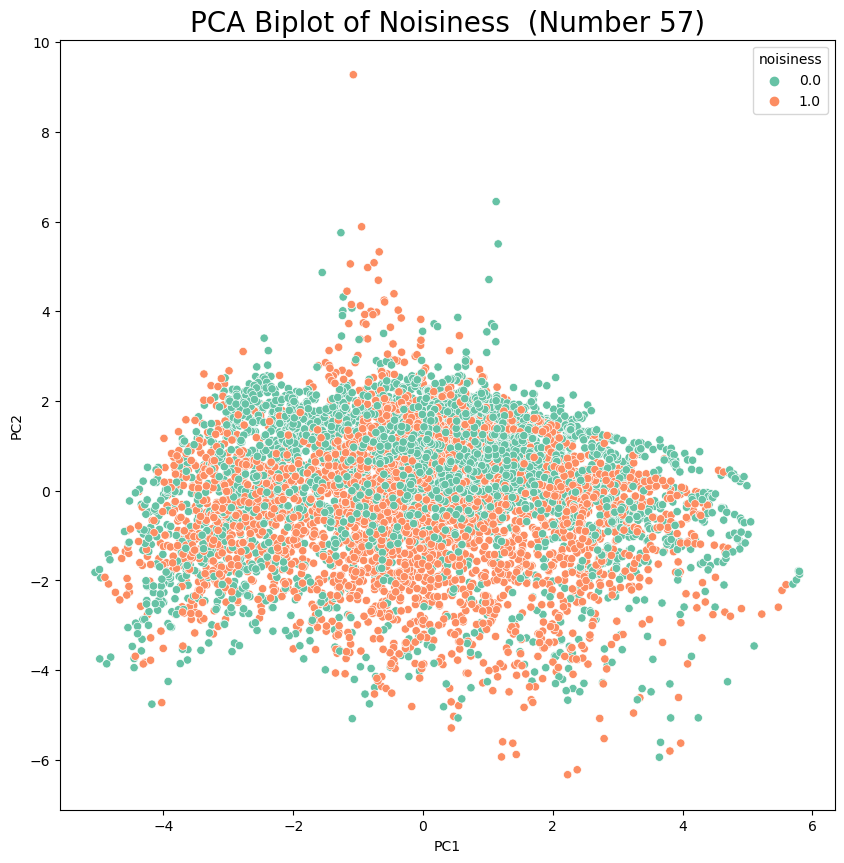

In [100]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

i = 1

data = list_df[i][['LC_HUMIDITY','LC_RAININ','LC_TEMP_QCL3_list', 'LC_DWPTEMP', 'LC_DWPTEMP',	'LC_RAD', 'LC_DAILYRAIN', 'LC_WINDDIR', 'LC_WINDSPEED','school', 'loko', 'depot','Saturday','Monday','Tuseday', 'Wednesday','Thursday','Friday','Saturday','Sunday','late-at-night','evening', 'summer']]
target = list_df[i]['noisiness'].astype(int)

#standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

#PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

#create a dataframe with the principal components
components_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
components_df['noisiness'] = target

# plot the principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='noisiness', data=components_df, palette='Set2')
plt.title('PCA Biplot of Noisiness  (' + str(list_df[i]["location"].values[0]) + ')', fontsize=20)
plt.show()

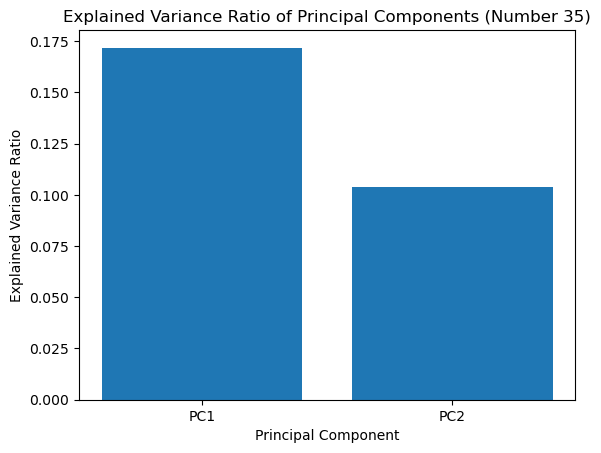

In [98]:
# plot the explained variance ratio

explained_variances = pca.explained_variance_ratio_
component_labels = ['PC1', 'PC2']

plt.bar(component_labels, explained_variances)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components (' + str(list_df[i]["location"].values[0]) + ')')
plt.show()

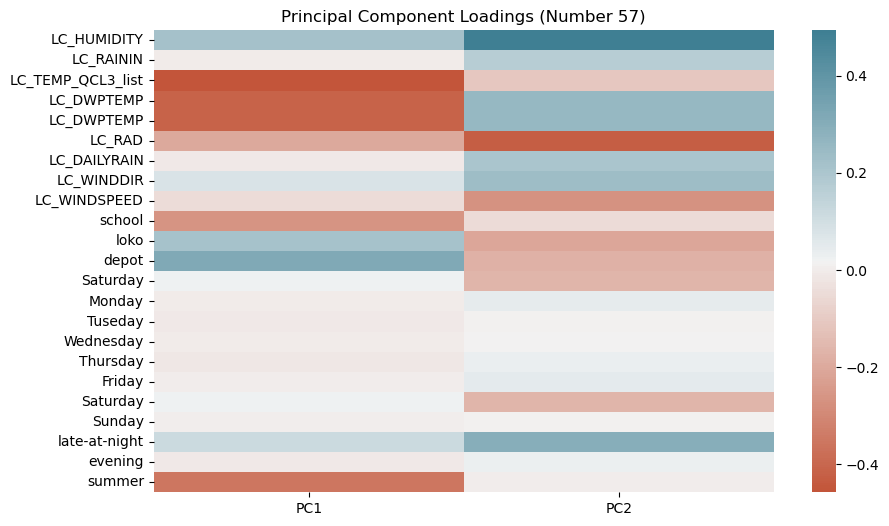

In [103]:
#plot the loadings
loadings = pca.components_
component_labels = ['PC1', 'PC2']
variable_labels = ['LC_HUMIDITY','LC_RAININ','LC_TEMP_QCL3_list', 'LC_DWPTEMP', 'LC_DWPTEMP',	'LC_RAD', 'LC_DAILYRAIN', 'LC_WINDDIR', 'LC_WINDSPEED','school', 'loko', 'depot','Saturday','Monday','Tuseday', 'Wednesday','Thursday','Friday','Saturday','Sunday','late-at-night','evening', 'summer']  # Replace with your actual variable names

plt.figure(figsize=(10, 6))
sns.heatmap(loadings.T, cmap=sns.diverging_palette(20, 220, n=200), xticklabels=component_labels, yticklabels=variable_labels)

plt.title('Principal Component Loadings ('+list_df[i]["location"].values[0]+')')
plt.show()



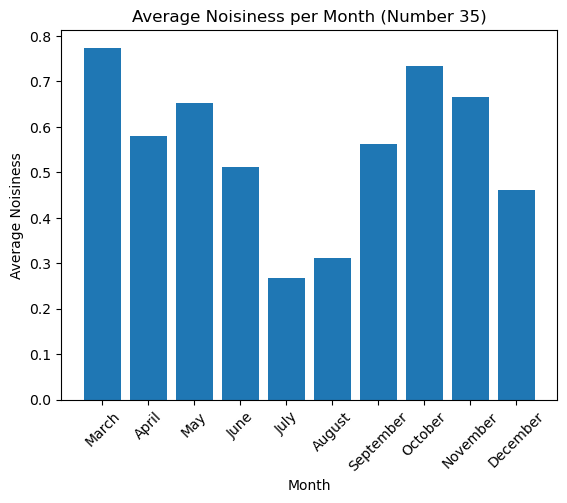

In [95]:
# Create a bar plot of the average noisiness per month

i = 0
list_df[i]['date'] = pd.to_datetime(list_df[i]['date'])
list_df[i] = list_df[i].dropna(subset=['laf50_per_hour'])

months = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
end_dates = ['2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
             '2022-10-31', '2022-11-30', '2022-12-31']
monthly_means = []

for month, end_date in zip(months, end_dates):
    monthly_mean = list_df[i]['noisiness'][(list_df[i]['date'] >= f'2022-{month}-01') & (list_df[i]['date'] <= end_date)].mean()
    monthly_means.append(monthly_mean)

# Create a bar plot
plt.bar(months, monthly_means)
plt.xlabel('Month')
plt.ylabel('Average Noisiness')
plt.title('Average Noisiness per Month (' + str(list_df[i]["location"].values[0]) + ')')
plt.xticks(rotation=45)
plt.show()


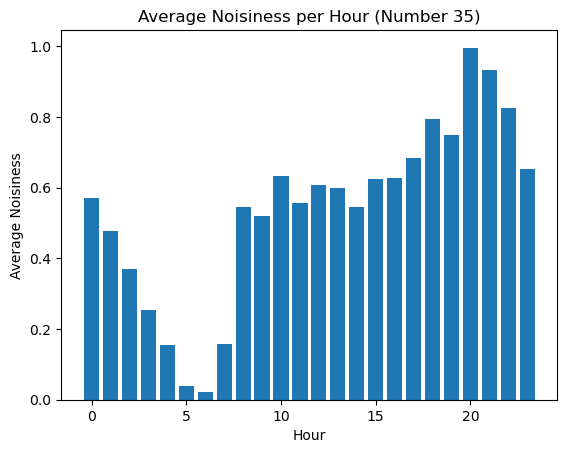

In [97]:
# Create a bar plot of the average noisiness per hour

i = 0
list_df[i]['date'] = pd.to_datetime(list_df[i]['date'])
list_df[i] = list_df[i].dropna(subset=['laf50_per_hour'])

hourly_means = []
for hour in range(24):
    hourly_mean = list_df[i]['noisiness'][list_df[i]['start_hour'] == hour].mean()
    hourly_means.append(hourly_mean)

# Create a bar plot
plt.bar(range(24), hourly_means)
plt.xlabel('Hour')
plt.ylabel('Average Noisiness')
plt.title('Average Noisiness per Hour (' + str(list_df[i]["location"].values[0]) + ')')
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7296 samples in 0.000s...
[t-SNE] Computed neighbors for 7296 samples in 0.286s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7296
[t-SNE] Computed conditional probabilities for sample 2000 / 7296
[t-SNE] Computed conditional probabilities for sample 3000 / 7296
[t-SNE] Computed conditional probabilities for sample 4000 / 7296
[t-SNE] Computed conditional probabilities for sample 5000 / 7296
[t-SNE] Computed conditional probabilities for sample 6000 / 7296
[t-SNE] Computed conditional probabilities for sample 7000 / 7296
[t-SNE] Computed conditional probabilities for sample 7296 / 7296
[t-SNE] Mean sigma: 3.988569
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.734634
[t-SNE] KL divergence after 1000 iterations: 1.152444


<Axes: xlabel='comp-1', ylabel='comp-2'>

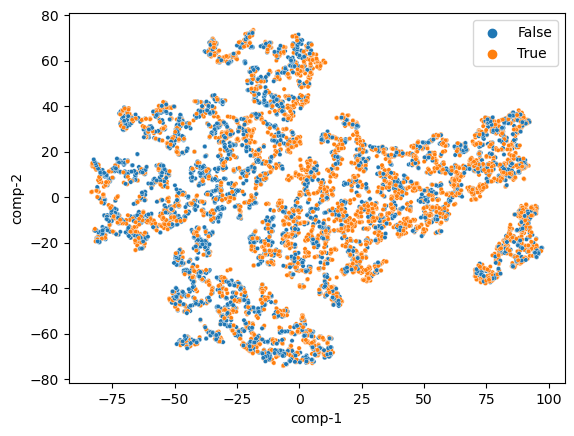

In [106]:
# Create t-SNE plot
from sklearn.manifold import TSNE

i=2;
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(list_df[i][['LC_HUMIDITY','LC_RAININ','LC_TEMP_QCL3_list', 'LC_DWPTEMP', 'LC_DWPTEMP',	'LC_RAD', 'LC_DAILYRAIN', 'LC_WINDDIR', 'LC_WINDSPEED','school', 'loko', 'depot','Saturday','Monday','Tuseday', 'Wednesday','Thursday','Friday','Saturday','Sunday','late-at-night','evening', 'summer']]) ;

df = pd.DataFrame()
df["y"] = list_df[i][['noisiness']]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),data=df,s=10)

# 03 Build models

from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

In [132]:
# Create an empty dictionary to store accuracy scores
accuracy_scores = {}
predictor_vars = ['LC_HUMIDITY','LC_RAININ','LC_TEMP_QCL3_list','school','loko','depot','Thursday-Friday','Saturday','Sunday','late-at-night','evening', 'summer']

### 03-01 RandomForest

In [133]:
iter_c = 0
for iter in list_df:
  data_it = pd.DataFrame(iter)
  data_it = data_it.dropna(subset=['laf50_per_hour'])
  data_it['date'] = pd.to_datetime(data_it['date'])
  X = data_it.loc[:,predictor_vars]
  Y = data_it.loc[:,'noisiness']

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=19)
  rf_model = RandomForestClassifier(random_state=19)
  rf_model.fit(X_train, y_train)
  y_pred_rf = rf_model.predict(X_test)
  accuracy_rf = accuracy_score(y_test, y_pred_rf)
  accuracy_scores[name_df[iter_c]] = {'Random Forest Accuracy': accuracy_rf}
  joblib.dump(value=rf_model,filename='model_'+str(name_df[iter_c])+'.gz',compress=3)
  iter_c = iter_c+1
#loop ends
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index')
print(accuracy_df)
print(accuracy_df.mean())

       Random Forest Accuracy
df_01                0.774194
df_02                0.799790
df_03                0.817725
df_04                0.852670
df_05                0.822293
df_06                0.791229
df_07                0.781457
df_09                0.734617
Random Forest Accuracy    0.796747
dtype: float64


### 03-02 XGBoost

In [135]:
from xgboost import XGBClassifier

iter_c = 0
for iter in list_df:
  data_it = pd.DataFrame(iter)
  data_it = data_it.dropna(subset=['laf50_per_hour'])
  data_it['date'] = pd.to_datetime(data_it['date'])
  X = data_it.loc[:,predictor_vars]
  Y = data_it.loc[:,'noisiness']

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=19)
  xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
  xgb_model.fit(X_train, y_train)
  y_pred_xgb = xgb_model.predict(X_test)
  accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
  accuracy_scores[name_df[iter_c]] = {'XGBoost Accuracy': accuracy_xgb}
  joblib.dump(value=xgb_model, filename='model_'+str(name_df[iter_c])+'.gz',compress=3)
  iter_c = iter_c+1
#loop ends
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index')
print(accuracy_df)
print(accuracy_df.mean())

       XGBoost Accuracy
df_01          0.765349
df_02          0.790881
df_03          0.815441
df_04          0.823204
df_05          0.836455
df_06          0.799909
df_07          0.784216
df_09          0.727662
XGBoost Accuracy    0.79289
dtype: float64


### 03-03 Logistic regression

In [140]:
from sklearn.linear_model import LogisticRegression

iter_c = 0
accuracy_scores = {}

for iter_data in list_df:
    data_it = pd.DataFrame(iter_data)
    data_it = data_it.dropna(subset=['laf50_per_hour'])
    data_it['date'] = pd.to_datetime(data_it['date'])
    
    X = data_it.loc[:, predictor_vars]
    Y = data_it.loc[:, 'noisiness']
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=19)
    
    lr_model = LogisticRegression(random_state=19, max_iter=1000)
    lr_model.fit(X_train, y_train)
    
    y_pred_lr = lr_model.predict(X_test)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    
    accuracy_scores[name_df[iter_c]] = {'Logistic Regression Accuracy': accuracy_lr}
    joblib.dump(value=lr_model, filename='model_' + str(name_df[iter_c]) + '.gz', compress=3)
    iter_c = iter_c+1

# Loop ends
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index')
print(accuracy_df)
print(accuracy_df.mean())


       Logistic Regression Accuracy
df_01                      0.760666
df_02                      0.776205
df_03                      0.803563
df_04                      0.815838
df_05                      0.820466
df_06                      0.778438
df_07                      0.777594
df_09                      0.674157
Logistic Regression Accuracy    0.775866
dtype: float64


### ROC

/Users/shinichimoribe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


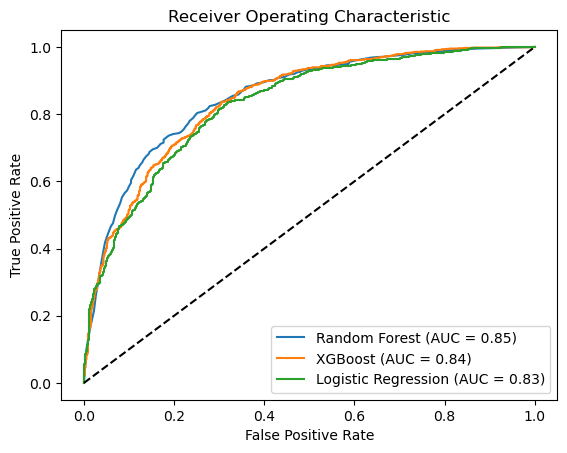

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score

i=0
data_it = pd.DataFrame(list_df[i])
data_it = data_it.dropna(subset=['laf50_per_hour'])
data_it['date'] = pd.to_datetime(data_it['date'])
    
X = data_it.loc[:, predictor_vars]
Y = data_it.loc[:, 'noisiness']
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=19)

# Random Forest
rf_model = RandomForestClassifier(random_state=19)
rf_model.fit(X_train, y_train)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

# XGBoost 
xgb_model = XGBClassifier(random_state=19)
xgb_model.fit(X_train, y_train)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)

# Logistic Regression
lr_model = LogisticRegression(random_state=19)
lr_model.fit(X_train, y_train)
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)

# plot ROC curves
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %.2f)' % auc_rf)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %.2f)' % auc_xgb)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()